# GNN Explainer Analysis

This notebook analyzes the outputs from GNNExplainer and PAGE explainers.

## Data Files
- `data/05_model_explanations/selected_triples.pkl` - The triples selected for explanation
- `data/05_model_explanations/gnn_explanations.pkl` - GNNExplainer results
- `data/05_model_explanations/page_explanations.pkl` - PAGE explainer results

In [1]:
import pickle
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set paths
DATA_DIR = Path('../data/05_model_explanations')

print(f'Data directory: {DATA_DIR}')
print(f'Files available: {list(DATA_DIR.glob("*.pkl"))}')

Data directory: ../data/05_model_explanations
Files available: [PosixPath('../data/05_model_explanations/selected_triples.pkl'), PosixPath('../data/05_model_explanations/gnn_explanations.pkl'), PosixPath('../data/05_model_explanations/page_explanations.pkl')]


## 1. Load Selected Triples

In [ ]:
# Load selected triples (with CPU mapping for CUDA tensors)
import functools
import io

class CPU_Unpickler(pickle.Unpickler):
    """Custom unpickler that maps CUDA tensors to CPU."""
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu', weights_only=False)
        else:
            return super().find_class(module, name)

def load_pickle_cpu(file_path):
    """Load pickle file with CUDA tensors mapped to CPU."""
    with open(file_path, 'rb') as f:
        return CPU_Unpickler(f).load()

selected_triples = load_pickle_cpu(DATA_DIR / 'selected_triples.pkl')

print('Selected Triples Structure:')
print(f'  Keys: {selected_triples.keys()}')
print(f'  Number of triples: {selected_triples["num_selected"]}')
print(f'  Source: {"from_file" if selected_triples.get("from_file") else "random"}')
print(f'  File path: {selected_triples.get("file_path", "N/A")}')

In [3]:
# Display triples as DataFrame
triples_df = pd.DataFrame(selected_triples['triples_readable'])
triples_df

,head_idx,tail_idx,relation_idx,head_name,tail_name,relation_name,triple
0,135879,217483,42,CHEBI:4462,MONDO:0006547,predicate:9,"(CHEBI:4462, predicate:9, MONDO:0006547)"
1,136363,195530,42,CHEBI:46195,HP:0002829,predicate:9,"(CHEBI:46195, predicate:9, HP:0002829)"
2,52587,201470,42,CHEBI:15365,HP:0012531,predicate:9,"(CHEBI:15365, predicate:9, HP:0012531)"
3,140036,217483,42,CHEBI:5134,MONDO:0006547,predicate:9,"(CHEBI:5134, predicate:9, MONDO:0006547)"
4,150506,222461,42,CHEBI:6539,MONDO:0011918,predicate:9,"(CHEBI:6539, predicate:9, MONDO:0011918)"
5,138114,222398,42,CHEBI:4875,MONDO:0011849,predicate:9,"(CHEBI:4875, predicate:9, MONDO:0011849)"
6,140075,216598,42,CHEBI:51380,MONDO:0005492,predicate:9,"(CHEBI:51380, predicate:9, MONDO:0005492)"
7,123539,216430,42,CHEBI:27732,MONDO:0005277,predicate:9,"(CHEBI:27732, predicate:9, MONDO:0005277)"
8,159132,195083,42,CHEBI:7476,HP:0001945,predicate:9,"(CHEBI:7476, predicate:9, HP:0001945)"
9,131435,216598,42,CHEBI:3645,MONDO:0005492,predicate:9,"(CHEBI:3645, predicate:9, MONDO:0005492)"


## 2. Load and Analyze GNNExplainer Results

In [ ]:
# Load GNN explanations (using CPU unpickler)
gnn_exp = load_pickle_cpu(DATA_DIR / 'gnn_explanations.pkl')

print('GNNExplainer Results:')
print(f'  Explainer type: {gnn_exp["explainer_type"]}')
print(f'  Num explanations: {gnn_exp["num_explanations"]}')
print(f'  Parameters: {gnn_exp["params"]}')

In [5]:
# Check for errors in GNNExplainer results
gnn_results = []
for i, exp in enumerate(gnn_exp['explanations']):
    result = {
        'idx': i,
        'triple': exp['triple']['triple'],
        'has_error': 'error' in exp,
        'error': exp.get('error', None),
        'error_type': exp.get('error_type', None)
    }
    gnn_results.append(result)

gnn_results_df = pd.DataFrame(gnn_results)
print(f'Successful explanations: {(~gnn_results_df["has_error"]).sum()}/{len(gnn_results_df)}')
print(f'Failed explanations: {gnn_results_df["has_error"].sum()}/{len(gnn_results_df)}')
gnn_results_df

Successful explanations: 0/10
Failed explanations: 10/10


,idx,triple,has_error,error,error_type
0,0,"(CHEBI:4462, predicate:9, MONDO:0006547)",True,'Parameter' object has no attribute 'weight',AttributeError
1,1,"(CHEBI:46195, predicate:9, HP:0002829)",True,'Parameter' object has no attribute 'weight',AttributeError
2,2,"(CHEBI:15365, predicate:9, HP:0012531)",True,'Parameter' object has no attribute 'weight',AttributeError
3,3,"(CHEBI:5134, predicate:9, MONDO:0006547)",True,'Parameter' object has no attribute 'weight',AttributeError
4,4,"(CHEBI:6539, predicate:9, MONDO:0011918)",True,'Parameter' object has no attribute 'weight',AttributeError
5,5,"(CHEBI:4875, predicate:9, MONDO:0011849)",True,'Parameter' object has no attribute 'weight',AttributeError
6,6,"(CHEBI:51380, predicate:9, MONDO:0005492)",True,'Parameter' object has no attribute 'weight',AttributeError
7,7,"(CHEBI:27732, predicate:9, MONDO:0005277)",True,'Parameter' object has no attribute 'weight',AttributeError
8,8,"(CHEBI:7476, predicate:9, HP:0001945)",True,'Parameter' object has no attribute 'weight',AttributeError
9,9,"(CHEBI:3645, predicate:9, MONDO:0005492)",True,'Parameter' object has no attribute 'weight',AttributeError


In [6]:
# If there are successful explanations, analyze them
successful_gnn = [exp for exp in gnn_exp['explanations'] if 'error' not in exp]

if successful_gnn:
    print(f'Analyzing {len(successful_gnn)} successful GNNExplainer results...')
    print()
    print('Structure of successful explanation:')
    for k, v in successful_gnn[0].items():
        if hasattr(v, 'shape'):
            print(f'  {k}: shape={v.shape}, dtype={v.dtype}')
        elif isinstance(v, dict):
            print(f'  {k}: dict with keys {list(v.keys())}')
        else:
            print(f'  {k}: {type(v).__name__}')
else:
    print('No successful GNNExplainer results to analyze.')
    print('All explanations failed with error:', gnn_exp['explanations'][0].get('error'))

No successful GNNExplainer results to analyze.
All explanations failed with error: 'Parameter' object has no attribute 'weight'


## 3. Load and Analyze PAGE Explainer Results

In [ ]:
# Load PAGE explanations (using CPU unpickler)
page_exp = load_pickle_cpu(DATA_DIR / 'page_explanations.pkl')

print('PAGE Explainer Results:')
print(f'  Explainer type: {page_exp["explainer_type"]}')
print(f'  Num explanations: {page_exp["num_explanations"]}')
print(f'  Model aware: {page_exp.get("model_aware", "N/A")}')
print(f'  Uses encoder: {page_exp.get("uses_encoder", "N/A")}')
print(f'  Uses decoder: {page_exp.get("uses_decoder", "N/A")}')
print()
print('Parameters:')
for k, v in page_exp['params'].items():
    print(f'  {k}: {v}')

In [8]:
# Analyze PAGE explanation structure
exp = page_exp['explanations'][0]
print('PAGE Explanation Structure:')
print(f'  Keys: {list(exp.keys())}')
print()
for k, v in exp.items():
    if hasattr(v, 'shape'):
        print(f'  {k}: tensor shape={v.shape}, dtype={v.dtype}')
    elif isinstance(v, dict):
        print(f'  {k}: dict with {len(v)} keys: {list(v.keys())}')
    else:
        print(f'  {k}: {type(v).__name__} = {v}')

PAGE Explanation Structure:
  Keys: ['triple', 'edge_importance_matrix', 'important_edges', 'important_edge_types', 'importance_scores', 'subgraph_info', 'latent_representation', 'prediction_score']

  triple: dict with 7 keys: ['head_idx', 'tail_idx', 'relation_idx', 'head_name', 'tail_name', 'relation_name', 'triple']
  edge_importance_matrix: tensor shape=torch.Size([3752, 3752]), dtype=torch.float32
  important_edges: tensor shape=torch.Size([2, 10]), dtype=torch.int64
  important_edge_types: tensor shape=torch.Size([10]), dtype=torch.int64
  importance_scores: tensor shape=torch.Size([10]), dtype=torch.float32
  subgraph_info: dict with 6 keys: ['triple_idx', 'num_nodes', 'num_edges', 'subgraph_nodes', 'subgraph_edges', 'prediction_score']
  latent_representation: tensor shape=torch.Size([3752, 16]), dtype=torch.float32
  prediction_score: float = 14.030548095703125


In [9]:
# Create summary DataFrame for PAGE results
page_summary = []
for i, exp in enumerate(page_exp['explanations']):
    triple_info = exp['triple']
    scores = exp['importance_scores']
    subg = exp['subgraph_info']
    
    page_summary.append({
        'idx': i,
        'triple': triple_info['triple'],
        'head': triple_info['head_name'],
        'relation': triple_info['relation_name'],
        'tail': triple_info['tail_name'],
        'prediction_score': exp['prediction_score'],
        'sigmoid_score': torch.sigmoid(torch.tensor(exp['prediction_score'])).item(),
        'subgraph_nodes': subg['num_nodes'],
        'subgraph_edges': subg['num_edges'],
        'importance_min': scores.min().item(),
        'importance_max': scores.max().item(),
        'importance_mean': scores.mean().item(),
        'importance_std': scores.std().item(),
    })

page_df = pd.DataFrame(page_summary)
page_df

,idx,triple,head,relation,tail,prediction_score,sigmoid_score,subgraph_nodes,subgraph_edges,importance_min,importance_max,importance_mean,importance_std
0,0,"(CHEBI:4462, predicate:9, MONDO:0006547)",CHEBI:4462,predicate:9,MONDO:0006547,14.030548,0.999999,3752,429672,0.500046,0.500064,0.500053,0.000006
1,1,"(CHEBI:46195, predicate:9, HP:0002829)",CHEBI:46195,predicate:9,HP:0002829,12.687877,0.999997,2646,328189,0.500046,0.500064,0.500052,0.000006
2,2,"(CHEBI:15365, predicate:9, HP:0012531)",CHEBI:15365,predicate:9,HP:0012531,11.866181,0.999993,3468,380206,0.500046,0.500064,0.500052,0.000006
3,3,"(CHEBI:5134, predicate:9, MONDO:0006547)",CHEBI:5134,predicate:9,MONDO:0006547,11.519256,0.999990,2186,251941,0.500040,0.500056,0.500048,0.000006
4,4,"(CHEBI:6539, predicate:9, MONDO:0011918)",CHEBI:6539,predicate:9,MONDO:0011918,10.050075,0.999957,2859,277345,0.500042,0.500064,0.500050,0.000007
5,5,"(CHEBI:4875, predicate:9, MONDO:0011849)",CHEBI:4875,predicate:9,MONDO:0011849,8.383912,0.999772,1951,191715,0.500053,0.500076,0.500060,0.000007
6,6,"(CHEBI:51380, predicate:9, MONDO:0005492)",CHEBI:51380,predicate:9,MONDO:0005492,8.335054,0.999760,1902,236994,0.500042,0.500064,0.500050,0.000008
7,7,"(CHEBI:27732, predicate:9, MONDO:0005277)",CHEBI:27732,predicate:9,MONDO:0005277,8.016473,0.999670,1994,223168,0.500047,0.500067,0.500056,0.000007
8,8,"(CHEBI:7476, predicate:9, HP:0001945)",CHEBI:7476,predicate:9,HP:0001945,7.893352,0.999627,3317,365609,0.500046,0.500064,0.500052,0.000006
9,9,"(CHEBI:3645, predicate:9, MONDO:0005492)",CHEBI:3645,predicate:9,MONDO:0005492,7.515547,0.999456,1478,156964,0.500042,0.500064,0.500050,0.000008


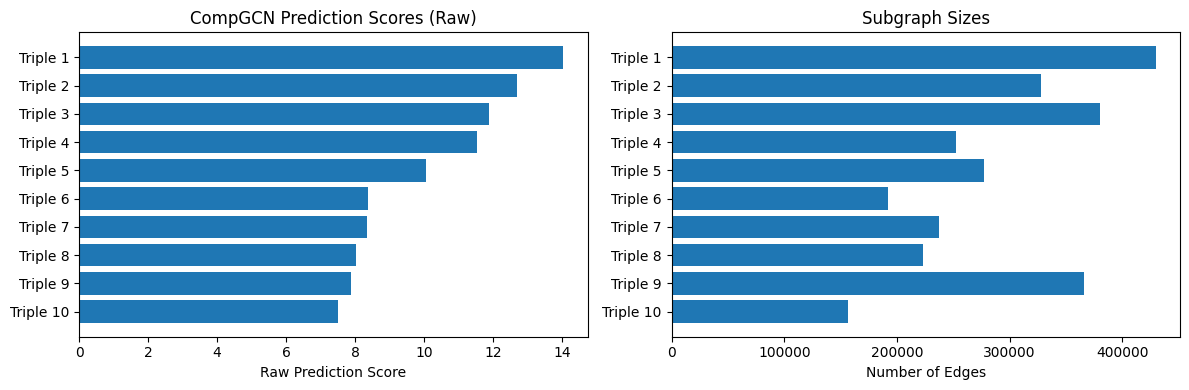

In [10]:
# Visualize prediction scores
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Raw scores
axes[0].barh(range(len(page_df)), page_df['prediction_score'])
axes[0].set_yticks(range(len(page_df)))
axes[0].set_yticklabels([f"Triple {i+1}" for i in range(len(page_df))])
axes[0].set_xlabel('Raw Prediction Score')
axes[0].set_title('CompGCN Prediction Scores (Raw)')
axes[0].invert_yaxis()

# Subgraph sizes
axes[1].barh(range(len(page_df)), page_df['subgraph_edges'])
axes[1].set_yticks(range(len(page_df)))
axes[1].set_yticklabels([f"Triple {i+1}" for i in range(len(page_df))])
axes[1].set_xlabel('Number of Edges')
axes[1].set_title('Subgraph Sizes')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 4. Detailed Analysis of Important Edges

In [ ]:
# Load knowledge graph for node/relation name lookups (using CPU unpickler)
kg_path = Path('../data/02_intermediate/knowledge_graph.pkl')
if kg_path.exists():
    kg = load_pickle_cpu(kg_path)
    idx_to_entity = kg.get('idx_to_entity', {})
    idx_to_relation = kg.get('idx_to_relation', {})
    print(f'Loaded knowledge graph: {len(idx_to_entity)} entities, {len(idx_to_relation)} relations')
else:
    print('Knowledge graph not found. Will use node indices instead of names.')
    idx_to_entity = {}
    idx_to_relation = {}

In [ ]:
def analyze_page_explanation(exp_idx, page_exp, idx_to_entity, idx_to_relation):
    """Analyze a single PAGE explanation in detail."""
    exp = page_exp['explanations'][exp_idx]
    
    triple = exp['triple']
    print(f"=== Explanation for Triple {exp_idx + 1} ===")
    print(f"Triple: {triple['triple']}")
    print(f"Head: {triple['head_name']} (idx: {triple['head_idx']})")
    print(f"Relation: {triple['relation_name']} (idx: {triple['relation_idx']})")
    print(f"Tail: {triple['tail_name']} (idx: {triple['tail_idx']})")
    print()
    
    # Prediction info
    pred = exp['prediction_score']
    print(f"Prediction score: {pred:.4f}")
    print(f"Sigmoid(score): {torch.sigmoid(torch.tensor(pred)).item():.6f}")
    print()
    
    # Subgraph info
    subg = exp['subgraph_info']
    print(f"Subgraph: {subg['num_nodes']} nodes, {subg['num_edges']} edges")
    print()
    
    # Important edges
    print("Top 10 Important Edges:")
    edges = exp['important_edges']  # [2, k] - these are GLOBAL node indices
    edge_types = exp['important_edge_types']  # [k]
    scores = exp['importance_scores']  # [k]
    
    if edges is None:
        print("  No important edges found.")
        return pd.DataFrame()
    
    edge_data = []
    for i in range(edges.shape[1]):
        # important_edges already contains GLOBAL node indices (not subgraph-local)
        src_orig = edges[0, i].item()
        dst_orig = edges[1, i].item()
        
        # Get names from knowledge graph mappings
        src_name = idx_to_entity.get(src_orig, f"node_{src_orig}")
        dst_name = idx_to_entity.get(dst_orig, f"node_{dst_orig}")
        rel_idx = edge_types[i].item()
        rel_name = idx_to_relation.get(rel_idx, f"rel_{rel_idx}")
        
        score = scores[i].item()
        
        edge_data.append({
            'rank': i + 1,
            'source': src_name,
            'source_idx': src_orig,
            'relation': rel_name,
            'target': dst_name,
            'target_idx': dst_orig,
            'importance': score
        })
        
        print(f"  {i+1}. {src_name} --[{rel_name}]--> {dst_name}  (score: {score:.6f})")
    
    return pd.DataFrame(edge_data)

# Analyze first explanation
edge_df = analyze_page_explanation(0, page_exp, idx_to_entity, idx_to_relation)

In [13]:
# Analyze all explanations
print("\n" + "="*80)
print("SUMMARY OF ALL PAGE EXPLANATIONS")
print("="*80 + "\n")

for i in range(len(page_exp['explanations'])):
    analyze_page_explanation(i, page_exp, idx_to_entity, idx_to_relation)
    print("\n" + "-"*80 + "\n")


SUMMARY OF ALL PAGE EXPLANATIONS

=== Explanation for Triple 1 ===
Triple: (CHEBI:4462, predicate:9, MONDO:0006547)
Head: CHEBI:4462 (idx: 135879)
Relation: predicate:9 (idx: 42)
Tail: MONDO:0006547 (idx: 217483)

Prediction score: 14.0305
Sigmoid(score): 0.999999

Subgraph: 3752 nodes, 429672 edges

Top 10 Important Edges:


IndexError: index 216404 is out of bounds for dimension 0 with size 3752

## 5. Analysis Notes

### Observations:

1. **GNNExplainer Status**: Check if GNNExplainer ran successfully or had errors.

2. **PAGE Importance Scores**: The importance scores from PAGE are very close to 0.5 with minimal variance. This suggests:
   - The VGAE may not be learning discriminative patterns
   - The reconstruction-based importance measure may not differentiate edges well
   - Consider tuning hyperparameters (more training epochs, different architecture)

3. **Subgraph Sizes**: Subgraphs are quite large (1500-3700 nodes), which may:
   - Dilute the importance signal across many edges
   - Slow down explanation
   - Consider using smaller k-hop neighborhoods or path-based extraction

4. **Prediction Confidence**: All triples have very high sigmoid scores (>0.999), indicating strong predictions.

In [ ]:
# Check importance score distribution across all explanations
all_scores = []
for exp in page_exp['explanations']:
    all_scores.extend(exp['importance_scores'].tolist())

plt.figure(figsize=(10, 4))
plt.hist(all_scores, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Importance Score')
plt.ylabel('Frequency')
plt.title('Distribution of PAGE Importance Scores (All Explanations)')
plt.axvline(x=np.mean(all_scores), color='r', linestyle='--', label=f'Mean: {np.mean(all_scores):.6f}')
plt.legend()
plt.show()

print(f'Score statistics:')
print(f'  Min: {np.min(all_scores):.6f}')
print(f'  Max: {np.max(all_scores):.6f}')
print(f'  Mean: {np.mean(all_scores):.6f}')
print(f'  Std: {np.std(all_scores):.6f}')
print(f'  Range: {np.max(all_scores) - np.min(all_scores):.6f}')